1. Import required libraries and read the dataset

In [1]:
import pandas as pd  # for pandas
import numpy as np   # for numpy
import matplotlib.pyplot as plt #for matplot 
%matplotlib inline
import seaborn as sns # for seaborn

# for sklearn liberaries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore  # for zscore
from sklearn.preprocessing import StandardScaler # for standardization
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math as mt

import warnings
warnings.filterwarnings("ignore")


2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [2]:
df=pd.read_csv("Apps_data+(1).csv")
sf=df.copy()
sf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
sf.shape

(10841, 13)

In [4]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Inference:-
1.Rating columns,Current Ver,Android Ver,Content Rating contains null values:-
2.Our Dataset contains 13 colunms and 10841 rows.
3.There are 12 Object type fetaures and 1 (Rating) float type features

3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model
building.

In [5]:
sf.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Inference:-
1.Meadian is greater than mean for  Rating feature so it may happen that it is an negatively skewed data

In [6]:
sf.describe(include=['object'])

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [8]:
#sf['Rating'].mean()

In [9]:
#sf.Rating.fillna(sf['Rating'].mean(),inplace=True)

In [10]:
#sf.dropna(inplace=True)

In [11]:
#sf.isna().sum()

In [12]:
#ch=pd.DataFrame(sf.App.str.isalpha()) #no garbage value
#ch[ch['App']==False].sum()

# Inference:-
1.Feature variable Category ,Type,content_Rating can be encoded as they are object type with the help of Label Encoder,One hot encoder

4. Check if there are any duplicate records in the dataset? if any drop them.

In [7]:
sf.duplicated().sum()

483

In [8]:
sf.drop_duplicates(inplace=True)

In [9]:
sf.duplicated().sum()

0

# Inference:-
1.Our data set contains 483 duplicated values so we can actually drop them

5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them

In [10]:
sf.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [1]:
#

In [11]:
sf.Category.replace({'1.9':np.nan},inplace=True)

In [12]:
sf.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

# inference 
1.The feature variable category conatins 1.9 as invalid category we have replced it with null values.

6. Check if there are missing values present in the column Rating, If any? drop them and and create a new
column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [13]:
sf.isna().sum()

App                  0
Category             1
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [14]:
sf.dropna(inplace=True)

In [15]:
sf.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [16]:
ch=pd.DataFrame(sf.App.str.isalpha()) #no garbage value
ch[ch['App']==False].sum()

App    0
dtype: int64

In [17]:
sf.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [18]:
def check(Rating):
    if Rating<=3.5:
        return 'low'
    else:
        return 'high'
sf['Rating_category']=sf['Rating'].apply(check)
#sf.drop(columns='Rating',inplace=True)

# inference:-
1.As we can there are 1465,11,,1,8,3 null entries in dataset in the feature variable. Rating,category,type,content_rating,current ver,android ver respectively. so we can drop them actually.
2.As in the rtaing feature some of values are above 3.5 and some of them are below so we can actually  encode them with high and low.

7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution

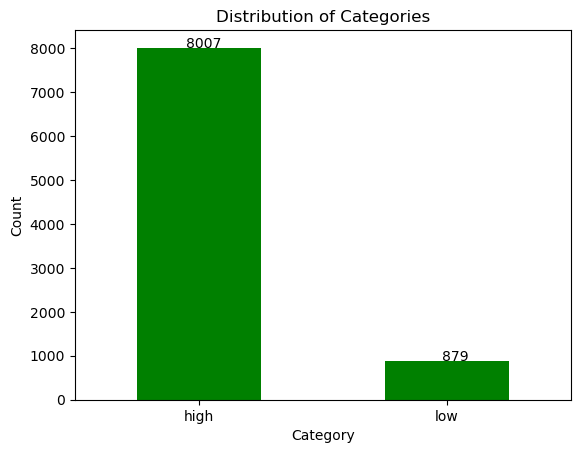

In [19]:
#plt.bar(sf['Rating_category'])
sf.Rating_category.value_counts().plot(kind='bar', rot = 0, color = 'green')

plt.text(x = -0.05, y = sf.Rating_category.value_counts()[0]+1, s =sf.Rating_category.value_counts()[0])
plt.text(x = 0.98, y =sf.Rating_category.value_counts()[1]+2, s =sf.Rating_category.value_counts()[1])
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Inference:-
1.The frequency of High category is actually greater (8007) as compared to low category which is 879.

8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and
handle the outliers using a transformation approach.

In [20]:
sf['Reviews']=sf.Reviews.astype(int)

In [21]:
sf.Reviews.dtype

dtype('int32')

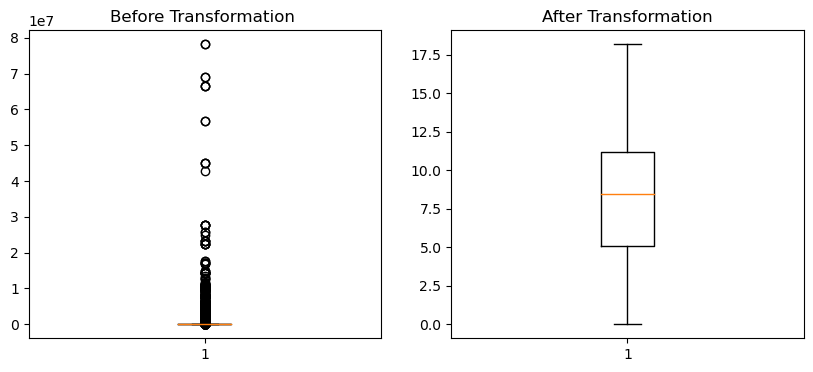

In [22]:
sf['Log_Reviews'] = np.log(sf['Reviews'])


fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].boxplot(sf['Reviews'])
axs[0].set_title('Before Transformation ')
axs[1].boxplot(sf['Log_Reviews'])
axs[1].set_title('After Transformation')
plt.show()

# Inference:-
1.As we can see there are a lot of outlier in the Reviews feature which we have treated with log transformation.

9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into
suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where
size='Varies with device')


In [23]:
sf['Size']=sf['Size'].str.replace('M','')
sf['Size']=sf['Size'].str.replace('k','')


In [24]:
sf.replace({'Size':{'Varies with device':np.nan}},inplace=True)

In [25]:
sf.isna().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size               1468
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           0
Android Ver           0
Rating_category       0
Log_Reviews           0
dtype: int64

In [26]:
sf.dropna(inplace=True)

# Inference:-
1.The size feature varible contains m and k as post_suffix so we have to remove them also it containg unsuitable value "varies with device" which we need to remove.

10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.


In [27]:
sf['Installs']=sf.Installs.str.replace(r'\D','')

In [28]:
sf['Insatlls']=sf.Installs.astype(int)

In [29]:
sf['Insatlls'].dtype

dtype('int32')

# inference:-
1.Installs feature  contains unwanted character "+" as  suffixso we have removed them

11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type

In [30]:
sf['Price']=sf.Price.str.replace(r'\D','')

In [31]:
sf['Price']=sf['Price'].astype(int)

In [32]:
sf.rename(columns={'Price':'Price_$'},inplace=True)

In [33]:
sf.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price_$', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Rating_category', 'Log_Reviews', 'Insatlls'],
      dtype='object')

# inference:-
1.price feature variable contains "$" as unwanted character so we have to remvove them.


12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we
created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated',
'Current Ver','Android Ver' columns since which are redundant for our analysis)


In [34]:
sf.drop(columns={'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' },axis=1,inplace=True)

In [35]:
sf.columns

Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price_$',
       'Content Rating', 'Rating_category', 'Log_Reviews', 'Insatlls'],
      dtype='object')

In [36]:
sf.head()

,Category,Reviews,Size,Installs,Type,Price_$,Content Rating,Rating_category,Log_Reviews,Insatlls
0,ART_AND_DESIGN,159,19,10000,Free,0,Everyone,high,5.068904,10000
1,ART_AND_DESIGN,967,14,500000,Free,0,Everyone,high,6.874198,500000
2,ART_AND_DESIGN,87510,8.7,5000000,Free,0,Everyone,high,11.379508,5000000
3,ART_AND_DESIGN,215644,25,50000000,Free,0,Teen,high,12.281384,50000000
4,ART_AND_DESIGN,967,2.8,100000,Free,0,Everyone,high,6.874198,100000


In [37]:
sf['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

# inference:-
1. There are some irrelevant columns like  'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' so we need to drop them. 

13. Encode the categorical columns.

In [38]:
le=LabelEncoder()
sf.iloc[:,[7]]=sf.iloc[:,[7]].apply(le.fit_transform) #o as high 1 as low

In [39]:
sf.iloc[:,[7]].value_counts()

Rating_category
0                  6594
1                   824
dtype: int64

In [51]:
sf1=sf.copy()


In [52]:
sf1.corr()

,Reviews,Price_$,Rating_category,Log_Reviews,Insatlls
Reviews,1.000000,-0.010015,-0.055529,0.332515,0.632032
Price_$,-0.010015,1.000000,0.004069,-0.037595,-0.010627
Rating_category,-0.055529,0.004069,1.000000,-0.233486,-0.055892
Log_Reviews,0.332515,-0.037595,-0.233486,1.000000,0.312519
Insatlls,0.632032,-0.010627,-0.055892,0.312519,1.000000


In [53]:
sf1.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '100', '500', '10', '1000000000', '5', '50', '1'], dtype=object)

In [56]:
sf1['Size']=sf1['Size'].astype(float)

In [57]:
sf1.Size.dtype

dtype('float64')

In [58]:

sf1['Installs']=sf1['Installs'].astype(int)

In [59]:
sf1.Installs.dtype

dtype('int32')

In [60]:
sf1 = pd.get_dummies(sf1, columns=['Category','Type','Content Rating'],drop_first=True)
sf1.head()

,Reviews,Size,Installs,Price_$,Rating_category,Log_Reviews,Insatlls,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,159,19.0,10000,0,0,5.068904,10000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,967,14.0,500000,0,0,6.874198,500000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,87510,8.7,5000000,0,0,11.379508,5000000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,215644,25.0,50000000,0,0,12.281384,50000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,967,2.8,100000,0,0,6.874198,100000,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Inference:-
1. We have encoded the Rating_category  by label encoder as it contains ordinal data .
2. whereas fetaure like 'Category','Type','Content Rating' containns norminal data so we have used encoding technique dummy_encoding

14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [61]:
x = sf1.drop('Rating_category', axis=1)



y = sf1[['Rating_category']]



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [62]:
print(x_train.head(), x_test.head(), y_train.head(), y_test.head())

      Reviews  Size  Installs  Price_$  Log_Reviews  Insatlls  \
4407    29505  69.0   1000000        0    10.292315   1000000   
5679    24312  25.0    500000        0    10.098725    500000   
6119        3  10.0        50        0     1.098612        50   
1564      601   5.1    100000        0     6.398595    100000   
8295    54034   5.8   5000000        0    10.897369   5000000   

      Category_AUTO_AND_VEHICLES  Category_BEAUTY  \
4407                           0                0   
5679                           0                0   
6119                           0                0   
1564                           0                0   
8295                           0                0   

      Category_BOOKS_AND_REFERENCE  Category_BUSINESS  ...  Category_TOOLS  \
4407                             0                  0  ...               0   
5679                             0                  0  ...               0   
6119                             0                  0  .

In [63]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(5192, 44) (2226, 44)
(5192, 1) (2226, 1)


dtype('O')

In [64]:
#mylist = list(sf1.select_dtypes(include=['O']).columns)
#mylist

# inference:-
1.we have used Rating_category as Target variable while others as independent features


15. Split the dataset into train and test.


In [ ]:
x = sf1.drop('Rating_category', axis=1)



y = sf1[['Rating_category']]



x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [ ]:
print(x_train.head(), x_test.head(), y_train.head(), y_test.head())

In [ ]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

16. Standardize the data, so that the values are within a particular range.


In [65]:
X_train_scaled  = x_train.apply(zscore)
X_test_scaled = x_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [67]:
print(X_train_scaled.head() ,X_test_scaled.head(),y_train_scaled.head(),y_test_scaled.head())

       Reviews      Size  Installs   Price_$  Log_Reviews  Insatlls  \
4407 -0.141868  0.315507 -0.154180 -0.064843     0.712517 -0.154180   
5679 -0.144763 -0.142240 -0.165647 -0.064843     0.660818 -0.165647   
6119 -0.158317 -0.298290 -0.177113 -0.064843    -1.742668 -0.177113   
1564 -0.157983 -0.349266 -0.174821 -0.064843    -0.327304 -0.174821   
8295 -0.128192 -0.341984 -0.062445 -0.064843     0.874097 -0.062445   

      Category_AUTO_AND_VEHICLES  Category_BEAUTY  \
4407                   -0.093504        -0.070943   
5679                   -0.093504        -0.070943   
6119                   -0.093504        -0.070943   
1564                   -0.093504        -0.070943   
8295                   -0.093504        -0.070943   

      Category_BOOKS_AND_REFERENCE  Category_BUSINESS  ...  Category_TOOLS  \
4407                     -0.135789           -0.17889  ...       -0.302018   
5679                     -0.135789           -0.17889  ...       -0.302018   
6119                

# Inference:-
1.After that we have used z-score for standadization purpose the standization will convert the whole dataset to range between -3 to +3